# K Class classifier using Least squares Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Training and Test Directory Paths

In [2]:
train_path = "Train"
test_path = "Test"
train_labels_path = "Train/Training Labels.txt"
test_labels_path = "Test/Test Labels.txt"

In [3]:
def get_data(dir_path, labels_path, num_of_imgs): 
    labels = open(labels_path).readlines()
    X = np.zeros([num_of_imgs, 784])
    T_labels = np.zeros([num_of_imgs,1])    
    for filepath in os.listdir(dir_path):
        if filepath.endswith(".jpg"):
            index = int(filepath[:-4]) - 1
            image_array = plt.imread(os.path.join(dir_path, filepath))\
                            .flatten()
            X[index] = image_array
            T_labels[index] = int(labels[index])
    X = np.insert(X, X.shape[1], values=1, axis=1)
    return X, T_labels

def create_confusion_matrix(T_predict, T_labels, label):
    T_predict = (T_predict > 0).astype(int)
    T_orig = np.mat(np.transpose(np.where(T_labels == label, 2, 0)))
    diff_vector = (T_orig - T_predict)
    # 2 - 1 = 1; 2-0 = 0
    T_true_true = np.count_nonzero(diff_vector == 1) 
    # 0 - 1 = -1
    T_false_true = np.count_nonzero(diff_vector < 0)
    # 2 - 0 = 2
    T_false_false = np.count_nonzero(diff_vector == 2)
    T_true_false = T_labels.shape[0] - T_true_true -\
                    T_false_true - T_false_false
#    TODO MAYBE CHANGE ORDER
    conf_mat = np.zeros([2,2])
    conf_mat[0][:] = T_true_true, T_false_true
    conf_mat[1][:] = T_false_false, T_true_false
    return conf_mat

def create_confusion_matrix2(all_test, T_labels):
    confusion_matrix = np.zeros([10,10])
    for i in range(0, T_labels.shape[0]):
        maxValueIndex = 0
        maxValue = (all_test[i,0])
        for j in range(1,10):
            if(all_test[i,j] > maxValue):
                maxValue = all_test[i,j]
                maxValueIndex = j
        currentLabel = maxValueIndex
        confusion_matrix[T_labels[i,0].astype(int),currentLabel] += 1
    return confusion_matrix
            


# Algorithm Implementation


### Loading Training Data and Labels.

In [4]:
X_train, T_train_labels = get_data(train_path, train_labels_path, 2400)

### Loading Test Data and Lables.

In [5]:
X_test, T_test_labels = get_data(test_path, test_labels_path, 200)

In [6]:
all_test = np.zeros([0,0])
for i in range(0, 10):
    T_train =  np.where(T_train_labels == i, 1, -1)
    X_train_t = np.transpose(X_train)
    weights = np.linalg.pinv(np.mat(X_train_t)*np.mat(X_train))\
                *np.mat(X_train_t)*np.mat(T_train)
    T_test = X_test * weights
    if(i == 0):
        all_test = T_test
    else:
        all_test = np.append(all_test, T_test , 1)

### Calculating Confusion Matrix

In [7]:
confusion_matrix = create_confusion_matrix2(all_test, T_test_labels)
print(confusion_matrix)

[[19.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  3. 11.  2.  2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 17.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 17.  1.  0.  1.  0.  1.]
 [ 0.  0.  0.  1.  0. 14.  1.  0.  2.  2.]
 [ 0.  0.  0.  0.  0.  0. 20.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0. 15.  0.  3.]
 [ 0.  0.  1.  0.  0.  3.  0.  0. 15.  1.]
 [ 1.  0.  0.  1.  1.  1.  0.  4.  0. 12.]]


### Converting confusion matrix to an Image

In [49]:
image = np.where(confusion_matrix >= 0 , (confusion_matrix / 20) * 255, (confusion_matrix / 20) * 255)
scaledImage = np.zeros([1,1])

#Scaling the 10x10 array to 500x500
for i in range(0,10):
    for j in range(0,10):
        if(j == 0):
            row = np.full((50,50) , image[i,0])
        else:
            row = np.append( row, np.full( (50,50) , image[i,j] ) , 0 )
    if(i == 0):
        scaledImage = row
    else:
        scaledImage = np.append(scaledImage, row , 1)
        
from PIL import Image
new_p = Image.fromarray(np.transpose(image))
new_p = new_p.convert("L")
new_p.save("Confusion.jpg")
new_p_scaled = Image.fromarray(np.transpose(scaledImage))
new_p_scaled = new_p_scaled.convert("L")
new_p_scaled.save("ConfusionScaled.jpg")

### Confusion Matrix Image

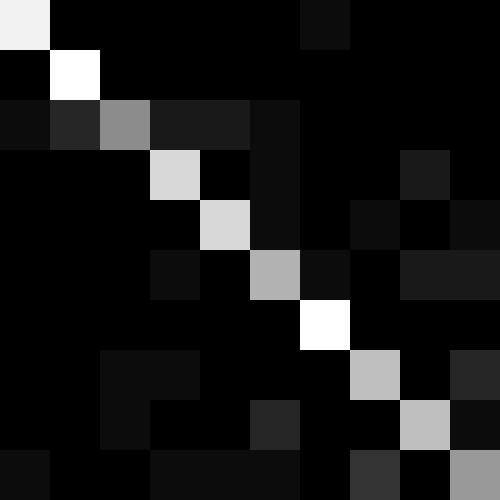

In [50]:
from IPython.display import Image as Img
Img(filename="ConfusionScaled.jpg")